In [4]:
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import nbformat

In [2]:
years = [y for y in range(2006, 2026)]
for year in years:
    url = f'https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year={year}'
    print(url)

https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2006
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2007
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2008
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2009
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2010
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2011
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2012
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2013
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2014
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2015
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2016
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2017
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2018
https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2019
https:

miliseconds -> timenow

In [ ]:
from datetime import datetime

dt = datetime.fromtimestamp(1139200200000 // 1000)
dt

datetime.datetime(2006, 2, 6, 13, 30)

In [43]:
url = 'https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year=2023'

params = {"year": 2023}
headers = {"User-Agent": "Mozilla/5.0"}  # 해외 IP 차단 우회에 도움될 수도 있음

response = requests.get(url, params=params, headers=headers)
print(response.status_code)
print(response.text)

403
<HTML><HEAD>
<TITLE>Access Denied</TITLE>
</HEAD><BODY>
<H1>Access Denied</H1>
 
You don't have permission to access "http&#58;&#47;&#47;www&#46;fire&#46;ca&#46;gov&#47;api&#47;sitecore&#47;Incident&#47;GetFiresByYear&#63;" on this server.<P>
Reference&#32;&#35;18&#46;2dad2c17&#46;1756304453&#46;16aec81a
<P>https&#58;&#47;&#47;errors&#46;edgesuite&#46;net&#47;18&#46;2dad2c17&#46;1756304453&#46;16aec81a</P>
</BODY>
</HTML>



## 1. Data download using API

In [ ]:
response = requests.get(url)
fire = pd.DataFrame()
years = [year for year in range(2006, 2026)]
headers = {"User-Agent": "Mozilla/5.0"}

for year in tqdm(years):
    url = f'https://www.fire.ca.gov/api/sitecore/Incident/GetFiresByYear?year={year}'
    response = requests.get(url, headers=headers)
    data = response.json()
    cols = data[0].keys()
    data_array = np.array([[value for value in data[i].values()] for i in range(len(data))])
    if year == years[0]:
        fire = pd.DataFrame(data_array, columns=cols)
    else:
        new = pd.DataFrame(data_array, columns=cols)
        fire = pd.concat([fire, new], ignore_index=True)

In [ ]:
headers = {"User-Agent": "Mozilla/5.0"}

#singleFire = pd.DataFrame()
for url in tqdm(fire['Url'][697:]):
    url2 = f'https://www.fire.ca.gov/api/sitecore/Incident/GetSingleFire?IncidentUrl={url}'
    response = requests.get(url2, headers=headers)
    data = response.json()
    cols = data.keys()
    data_array = [[value for value in data.values()]]
    new = pd.DataFrame(data_array, columns=cols)
    singleFire = pd.concat([singleFire, new], ignore_index=True)

## 2. Data Proprocessing

In [5]:
fire = pd.read_excel(r'C:\Users\SSAFY\vscode_psb\liveCodingTest\fire.xlsx')
singleFire = pd.read_excel(r'C:\Users\SSAFY\vscode_psb\liveCodingTest\singleFire.xlsx')

display(fire)
display(singleFire)

Name     Updated     Started  \
0         Sierra Fire  2006-02-12  2006-02-06   
1       Arrastre Fire  2006-06-09  2006-06-09   
2         Plunge Fire  2006-06-19  2006-01-23   
3        Perkins Fire  2006-06-25  2006-06-19   
4     Del Puerto Fire  2003-07-24  2003-07-20   
...               ...         ...         ...   
4008      Butter Fire  2025-08-26  2025-08-26   
4009       Grade Fire  2025-08-27  2025-08-26   
4010        3-27 Fire  2025-08-26  2025-08-26   
4011        H-10 Fire  2025-08-26  2025-08-26   
4012  Franciscan Fire  2025-08-27  2025-08-26   

                                              AdminUnit            County  \
0                               USFS/Orange County Fire  Orange,Riverside   
1                        San Bernardino National Forest    San Bernardino   
2                        San Bernardino National Forest    San Bernardino   
3                            Los Padres National Forest     Santa Barbara   
4                                  CDF Santa Clara Unit        Stanislaus   
...                                                 ...               ...   
4008  Bureau of Land Management - California Desert ...              Kern   
4009                             CAL FIRE Siskiyou Unit          Siskiyou   
4010                         CAL FIRE Lassen-Modoc Unit            Lassen   
4011                             Lassen National Forest            Shasta   
4012                       CAL FIRE Shasta-Trinity Unit            Shasta   

                                               Location  AcresBurned  \
0                                         Corona/Orange      10584.0   
1                         6 miles east of Big Bear City        361.0   
2                     2-3 miles south of Running Spring        485.0   
3                         South of the community of New      15043.0   
4                          Del Puerto Canyon Road/MP 16       5909.0   
...                                                 ...          ...   
4008  Butterbredt Canyon Road, East of Pacific Crest...         48.0   
4009                        West Lava Rim Road, Pondosa         10.0   
4010                Southeast of Pumpkin Center, Bieber         24.0   
4011         Forest Road 36N18 & Butte Creek, Hat Creek         10.6   
4012               Franciscan Way & Derch Road, Redding         34.0   

      PercentContained   Longitude   Latitude      Type  \
0                  100    0.000000   0.000000       NaN   
1                  100    0.000000   0.000000       NaN   
2                  100    0.000000   0.000000       NaN   
3                  100    0.000000   0.000000       NaN   
4                  100    0.000000   0.000000       NaN   
...                ...         ...        ...       ...   
4008                 0 -118.147758  35.464035  Wildfire   
4009                15 -121.590689  41.217878  Wildfire   
4010                 0 -121.057196  41.088854  Wildfire   
4011                 0 -121.330697  40.737144  Wildfire   
4012                 0 -122.181166  40.472116  Wildfire   

                                  UniqueId  \
0     7bc3e973-7c13-4e62-926a-c6d25d4fa426   
1     8e7f4ac2-1628-4263-97d9-3c8d9da126e3   
2     16d75336-a2e0-4dc0-b894-873e80e3db9f   
3     9f2d8497-ffff-4d8e-a0ac-38a340fef8ab   
4     472b6bb1-1cf3-4157-810b-6f298ba3f938   
...                                    ...   
4008  aa24ecdd-5b7c-4ef2-8423-dc88687c5965   
4009  eb382b3b-d965-4bae-a906-c1bde34d4ec5   
4010  270ab2cc-1c68-4ffc-a7b2-5990bebe1de6   
4011  48a9cb94-d7ee-482e-a4fe-274f5b20d1ac   
4012  a09db6c1-addb-4985-b09f-79c9dee4dcea   

                                        Url  StartedDateOnly  IsActive  \
0          /incidents/2006/2/6/sierra-fire/              NaN     False   
1        /incidents/2006/6/9/arrastre-fire/              NaN     False   
2         /incidents/2006/1/23/plunge-fire/              NaN     False   
3        /incidents/2006/6/19/perkins-fire/              NaN     False   
4     

Name  Final                Updated                Started  \
0         Sierra Fire   True  /Date(1139767200000)/  /Date(1139200200000)/   
1       Arrastre Fire   True  /Date(1149867180000)/  /Date(1149857460000)/   
2         Plunge Fire   True  /Date(1150731480000)/  /Date(1138019520000)/   
3        Perkins Fire   True  /Date(1151262000000)/  /Date(1150730280000)/   
4     Del Puerto Fire   True  /Date(1059030000000)/  /Date(1058695680000)/   
...               ...    ...                    ...                    ...   
4008      Butter Fire  False  /Date(1756241505340)/  /Date(1756207966000)/   
4009       Grade Fire  False  /Date(1756275093127)/  /Date(1756218897000)/   
4010        3-27 Fire  False  /Date(1756245737990)/  /Date(1756221842000)/   
4011        H-10 Fire  False  /Date(1756241380080)/  /Date(1756202750000)/   
4012  Franciscan Fire  False  /Date(1756258749410)/  /Date(1756242407000)/   

                                              AdminUnit  AdminUnitUrl  County  \
0                               USFS/Orange County Fire           NaN     NaN   
1                        San Bernardino National Forest           NaN     NaN   
2                        San Bernardino National Forest           NaN     NaN   
3                            Los Padres National Forest           NaN     NaN   
4                                  CDF Santa Clara Unit           NaN     NaN   
...                                                 ...           ...     ...   
4008  Bureau of Land Management - California Desert ...           NaN     NaN   
4009                             CAL FIRE Siskiyou Unit           NaN     NaN   
4010                         CAL FIRE Lassen-Modoc Unit           NaN     NaN   
4011                             Lassen National Forest           NaN     NaN   
4012                       CAL FIRE Shasta-Trinity Unit           NaN     NaN   

                     Counties  \
0     ['Orange', 'Riverside']   
1          ['San Bernardino']   
2          ['San Bernardino']   
3           ['Santa Barbara']   
4              ['Stanislaus']   
...                       ...   
4008                 ['Kern']   
4009             ['Siskiyou']   
4010               ['Lassen']   
4011               ['Shasta']   
4012               ['Shasta']   

                                               Location  AcresBurned  ...  \
0                                         Corona/Orange      10584.0  ...   
1                         6 miles east of Big Bear City        361.0  ...   
2                     2-3 miles south of Running Spring        485.0  ...   
3                         South of the community of New      15043.0  ...   
4                          Del Puerto Canyon Road/MP 16       5909.0  ...   
...                                                 ...          ...  ...   
4008  Butterbredt Canyon Road, East of Pacific Crest...         48.0  ...   
4009                        West Lava Rim Road, Pondosa         10.0  ...   
4010                Southeast of Pumpkin Center, Bieber         24.0  ...   
4011         Forest Road 36N18 & Butte Creek, Hat Creek         10.6  ...   
4012               Franciscan Way & Derch Road, Redding         34.0  ...   

                                               Agencies  \
0     [{'Name': 'USFS/Orange County Fire', 'AgencyUR...   
1     [{'Name': 'San Bernardino National Forest', 'A...   
2     [{'Name': 'San Bernardino National Forest', 'A...   
3     [{'Name': 'Los Padres National Forest', 'Agenc...   
4     [{'Name': 'CDF Santa Clara Unit', 'AgencyURL':...   
...                                                 ...   
4008                                                 []   
4009                                                 []   
4010                                                 []   
4011                                                 []   
4012                                                 []   

     UnifiedCommandAgencies  mapZoom  AdditionalInfo  IncidentCameras  \
0  

### 2-1. Fire data preprocessing

In [6]:
to_float = ['PercentContained','Longitude','Latitude']
to_date = ['Updated','Started']
fire[to_float] = fire[to_float].astype('float64')
fire['Updated'] = pd.to_datetime(fire['Updated'], errors='coerce')
fire['Started'] = pd.to_datetime(fire['Started'], errors='coerce')
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              4013 non-null   object        
 1   Updated           4013 non-null   datetime64[ns]
 2   Started           4013 non-null   datetime64[ns]
 3   AdminUnit         3948 non-null   object        
 4   County            3989 non-null   object        
 5   Location          4009 non-null   object        
 6   AcresBurned       4013 non-null   float64       
 7   PercentContained  4013 non-null   float64       
 8   Longitude         4013 non-null   float64       
 9   Latitude          4013 non-null   float64       
 10  Type              2027 non-null   object        
 11  UniqueId          4013 non-null   object        
 12  Url               4013 non-null   object        
 13  StartedDateOnly   0 non-null      float64       
 14  IsActive          4013 n

### 2-2. singleFire data preprocessing

In [7]:
# miliseconds -> YYYYMMDD

to_date2 = ['Updated', 'Started', 'ExtinguishedDate', 'ExtinguishedDateOnly', 'StartedDateOnly', 'ExpectedContainment']

def date_convert(x):
    if pd.isna(x) or x =="":
        return np.nan
    else:
        return datetime.fromtimestamp(x)

for col in to_date2:
    singleFire[col] = singleFire[col].apply(lambda x: int(x[6:-2])//1000)
    singleFire[col] = singleFire[col].replace(singleFire[singleFire[col] < 0][col].unique(), np.nan)
    singleFire[col] = singleFire[col].apply(date_convert)
singleFire['Name'] = singleFire['Name'].apply(lambda x: x.strip())
singleFire

Name  Final             Updated             Started  \
0         Sierra Fire   True 2006-02-13 03:00:00 2006-02-06 13:30:00   
1       Arrastre Fire   True 2006-06-10 00:33:00 2006-06-09 21:51:00   
2         Plunge Fire   True 2006-06-20 00:38:00 2006-01-23 21:32:00   
3        Perkins Fire   True 2006-06-26 04:00:00 2006-06-20 00:18:00   
4     Del Puerto Fire   True 2003-07-24 16:00:00 2003-07-20 19:08:00   
...               ...    ...                 ...                 ...   
4008      Butter Fire  False 2025-08-27 05:51:45 2025-08-26 20:32:46   
4009       Grade Fire  False 2025-08-27 15:11:33 2025-08-26 23:34:57   
4010        3-27 Fire  False 2025-08-27 07:02:17 2025-08-27 00:24:02   
4011        H-10 Fire  False 2025-08-27 05:49:40 2025-08-26 19:05:50   
4012  Franciscan Fire  False 2025-08-27 10:39:09 2025-08-27 06:06:47   

                                              AdminUnit  AdminUnitUrl  County  \
0                               USFS/Orange County Fire           NaN     NaN   
1                        San Bernardino National Forest           NaN     NaN   
2                        San Bernardino National Forest           NaN     NaN   
3                            Los Padres National Forest           NaN     NaN   
4                                  CDF Santa Clara Unit           NaN     NaN   
...                                                 ...           ...     ...   
4008  Bureau of Land Management - California Desert ...           NaN     NaN   
4009                             CAL FIRE Siskiyou Unit           NaN     NaN   
4010                         CAL FIRE Lassen-Modoc Unit           NaN     NaN   
4011                             Lassen National Forest           NaN     NaN   
4012                       CAL FIRE Shasta-Trinity Unit           NaN     NaN   

                     Counties  \
0     ['Orange', 'Riverside']   
1          ['San Bernardino']   
2          ['San Bernardino']   
3           ['Santa Barbara']   
4              ['Stanislaus']   
...                       ...   
4008                 ['Kern']   
4009             ['Siskiyou']   
4010               ['Lassen']   
4011               ['Shasta']   
4012               ['Shasta']   

                                               Location  AcresBurned  ...  \
0                                         Corona/Orange      10584.0  ...   
1                         6 miles east of Big Bear City        361.0  ...   
2                     2-3 miles south of Running Spring        485.0  ...   
3                         South of the community of New      15043.0  ...   
4                          Del Puerto Canyon Road/MP 16       5909.0  ...   
...                                                 ...          ...  ...   
4008  Butterbredt Canyon Road, East of Pacific Crest...         48.0  ...   
4009                        West Lava Rim Road, Pondosa         10.0  ...   
4010                Southeast of Pumpkin Center, Bieber         24.0  ...   
4011         Forest Road 36N18 & Butte Creek, Hat Creek         10.6  ...   
4012               Franciscan Way & Derch Road, Redding         34.0  ...   

                                               Agencies  \
0     [{'Name': 'USFS/Orange County Fire', 'AgencyUR...   
1     [{'Name': 'San Bernardino National Forest', 'A...   
2     [{'Name': 'San Bernardino National Forest', 'A...   
3     [{'Name': 'Los Padres National Forest', 'Agenc...   
4     [{'Name': 'CDF Santa Clara Unit', 'AgencyURL':...   
...                                                 ...   
4008                                                 []   
4009                                                 []   
4010                                                 []   
4011                                                 []   
4012                                                 []   

     UnifiedCommandAgencies  mapZoom  AdditionalInfo  IncidentCameras  \
0                        []       12              []              NaN   
1 

## 3. Problem

- Total number of events and Acres burned

In [8]:
print(f"Total number of events: {fire.shape[0]}")
print(f"Total Acres burned: {sum(fire['AcresBurned'])}")

Total number of events: 4013
Total Acres burned: 16644353.53


- Identify high-risk fires (e.g., Acres Burned > 50000 or active more than 30 days: 
extinguished date - started date)

In [9]:
singleFire[['Started','ExtinguishedDate']].dropna().shape[0]

3264

In [10]:
print("The number of both Started and ExtinguishedDate existed is", singleFire[['Started','ExtinguishedDate']].dropna().shape[0], "among", singleFire.shape[0], '\n')

condition1 = (singleFire['AcresBurned'] > 50000)
condition2 = (singleFire['ExtinguishedDate'] - singleFire['Started']) > pd.Timedelta(days=30)

print("high-risk fires")
display(len(singleFire[condition1 & condition2]['Name']))
# print("\nHigh risk fires are total 869.")

The number of both Started and ExtinguishedDate existed is 3264 among 4013 

high-risk fires


41

In [11]:
singleFire[condition2]

Name  Final             Updated  \
2                   Plunge Fire   True 2006-06-20 00:38:00   
17        Heart-Millard Complex   True 2006-09-11 04:00:00   
33               Uncles Complex   True 2006-10-24 02:00:00   
37              Orleans Complex   True 2006-11-08 16:00:00   
39    Bar Complex (Pigeon Fire)   True 2006-11-15 17:00:00   
...                         ...    ...                 ...   
3344                 Borel Fire   True 2025-06-04 00:27:31   
3360              Morrison Fire   True 2024-12-20 18:18:04   
3508                  Shoe Fire   True 2025-06-04 00:33:04   
3823                 Green Fire   True 2025-08-18 15:06:08   
3831        Marble Complex Fire   True 2025-08-05 06:13:22   

                 Started                                          AdminUnit  \
2    2006-01-23 21:32:00                     San Bernardino National Forest   
17   2006-07-14 16:22:00                     San Bernardino National Forest   
33   2006-07-23 22:00:00                            Klamath National Forest   
37   2006-07-24 20:55:00                         Six Rivers National Forest   
39   2006-07-27 02:05:00                  Shasta - Trinity National Forest    
...                  ...                                                ...   
3344 2024-07-24 21:59:10                        Sequoia National Forest\r\n   
3360 2024-08-04 19:46:39                              National Park Service   
3508 2024-10-09 22:18:46                     Shasta Trinity National Forest   
3823 2025-07-02 06:37:01  United States Forest Service: Shasta Trinity N...   
3831 2025-07-03 20:20:53  United States Forest Service: Klamath National...   

      AdminUnitUrl  County            Counties  \
2              NaN     NaN  ['San Bernardino']   
17             NaN     NaN  ['San Bernardino']   
33             NaN     NaN        ['Siskiyou']   
37             NaN     NaN        ['Humboldt']   
39             NaN     NaN         ['Trinity']   
...            ...     ...                 ...   
3344           NaN     NaN            ['Kern']   
3360           NaN     NaN        ['Tuolumne']   
3508           NaN     NaN          ['Shasta']   
3823           NaN     NaN          ['Shasta']   
3831           NaN     NaN        ['Siskiyou']   

                                               Location  AcresBurned  ...  \
2                     2-3 miles south of Running Spring        485.0  ...   
17                                                  NaN      24000.0  ...   
33          North of Sawyers Bar, Marble Mt. Wilderness      30454.0  ...   
37                                                  NaN      15710.0  ...   
39                   North and northwest of Weaverville     100414.0  ...   
...                                                 ...          ...  ...   
3344                      Highway 178, East of Democrat      59288.0  ...   
3360        Near Morrison Creek, Yosemite National Park         30.0  ...   
3508  Fenders Ferry Road near Madrone Campground, So...       5124.0  ...   
3823                     North of the Pit River, Shasta      19022.0  ...   
3831                         Marble Mountain Wilderness        747.0  ...   

                                               Agencies  \
2     [{'Name': 'San Bernardino National Forest', 'A...   
17    [{'Name': 'San Bernardino National Forest', 'A...   
33    [{'Name': 'Klamath National Forest', 'AgencyUR...   
37    [{'Name': 'Six Rivers National Forest', 'Agenc...   
39    [{'Name': 'Shasta - Trinity National Forest ',...   
...                                                 ...   
3344                                                 []   
3360                                                 []   
3508                                                 []   
3823                                                 []   
3831                                                 []   

     UnifiedCommandAgencies  mapZoom  \
2                        []       12   
17                

- Time series of fire events and Acres burned per month

In [12]:
# Started 기준으로 진행
s = singleFire.__deepcopy__()
s['year'] = s['Started'].dt.year
s['month'] = s['Started'].dt.month

events_per_month = s.groupby(['year', 'month'])['Name'].count()
acresBurned_per_month = s.groupby(['year', 'month'])['AcresBurned'].sum()

print("Time series of fire events")
display(pd.DataFrame(events_per_month))

print("Time series Acres burned per month")
display(pd.DataFrame(acresBurned_per_month))

Time series of fire events


Name
year   month      
2003.0 7.0       1
2006.0 1.0       1
       2.0       1
       6.0       5
       7.0      36
...            ...
2025.0 4.0      15
       5.0      79
       6.0     115
       7.0     108
       8.0      90

[189 rows x 1 columns]

Time series Acres burned per month


AcresBurned
year   month             
2003.0 7.0         5909.0
2006.0 1.0          485.0
       2.0        10584.0
       6.0        25247.0
       7.0       364813.0
...                   ...
2025.0 4.0          654.9
       5.0        13460.8
       6.0        24989.9
       7.0       131836.8
       8.0       168721.6

[189 rows x 1 columns]

In [84]:
'2023' + '-' + '7'

'2023-7'

In [41]:
test = events_per_month.reset_index()
# test['year'] = test['year'].astype(int).astype(str)
# test['month'] = test['month'].astype(int).astype(str)
# # test['date'] = ftest['year'] + '-' + test['month']
# test['date'] = test['year'] + '-' + test['month']
test

year  month  Name
0    2003.0    7.0     1
1    2006.0    1.0     1
2    2006.0    2.0     1
3    2006.0    6.0     5
4    2006.0    7.0    36
..      ...    ...   ...
184  2025.0    4.0    15
185  2025.0    5.0    79
186  2025.0    6.0   115
187  2025.0    7.0   108
188  2025.0    8.0    90

[189 rows x 3 columns]

In [42]:
test[['year','month']] = test[['year','month']].astype(int)

In [50]:
test

year  month  Name
0    2003      7     1
1    2006      1     1
2    2006      2     1
3    2006      6     5
4    2006      7    36
..    ...    ...   ...
184  2025      4    15
185  2025      5    79
186  2025      6   115
187  2025      7   108
188  2025      8    90

[189 rows x 3 columns]

In [52]:
test.apply(lambda x: datetime(x['year'],x['month'],1), axis=1)

0     2003-07-01
1     2006-01-01
2     2006-02-01
3     2006-06-01
4     2006-07-01
         ...    
184   2025-04-01
185   2025-05-01
186   2025-06-01
187   2025-07-01
188   2025-08-01
Length: 189, dtype: datetime64[ns]

In [53]:
test['date'] = test[['year','month']].apply(lambda x: datetime(int(x[0]),int(x[1]),1),axis=1)
# test['date'] = test.apply(lambda x: datetime(x['year'],x['month'],1))
test

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_2476\1534495009.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test['date'] = test[['year','month']].apply(lambda x: datetime(int(x[0]),int(x[1]),1),axis=1)


year  month  Name       date
0    2003      7     1 2003-07-01
1    2006      1     1 2006-01-01
2    2006      2     1 2006-02-01
3    2006      6     5 2006-06-01
4    2006      7    36 2006-07-01
..    ...    ...   ...        ...
184  2025      4    15 2025-04-01
185  2025      5    79 2025-05-01
186  2025      6   115 2025-06-01
187  2025      7   108 2025-07-01
188  2025      8    90 2025-08-01

[189 rows x 4 columns]

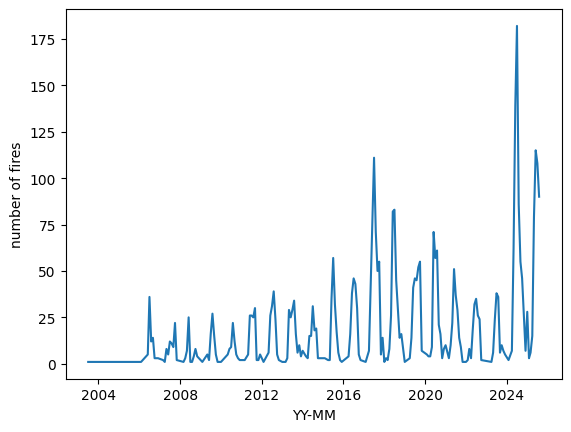

In [46]:
import matplotlib.pyplot as plt

plt.plot(pd.to_datetime(test[['year', 'month']].astype(int).assign(day=1)), events_per_month.values)
plt.xlabel('YY-MM')
plt.ylabel('number of fires')
plt.show()

- Bonus 1. Cluster fires within a 100 km radius that overlap in their active periods

발생 기간이 겹치는 산불 중 반경 100km 이내의 군집 산불 추출

- Bonus 2. Calculate the average assessed property value by county and identify the top five fires with the greatest property losses over the past 20 years

In [ ]:
# data collect using API

import requests

url = 'https://www.boe.ca.gov/DataPortal/api/odata/County_Assessed_Property_Values_by_Property_Class_and_County'

headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
data = response.json()
data

{'@odata.context': 'https://www.boe.ca.gov/DataPortal/api/odata/$metadata#County_Assessed_Property_Values_by_Property_Class_and_County',
 'value': [{'AssessmentYearFrom': 2000,
   'AssessmentYearTo': 2001,
   'County': 'Alameda',
   'LandAssessedValue': 34717087000,
   'ImprovementsAssessedValue': 70021609000,
   'PersonalPropertyAssessedValue': 7274160000,
   'Exemptions': 2885547000,
   'NetTotal': 109127309000,
   'YearToYearChange': 10.0},
  {'AssessmentYearFrom': 2000,
   'AssessmentYearTo': 2001,
   'County': 'Alpine',
   'LandAssessedValue': 101844000,
   'ImprovementsAssessedValue': 165528000,
   'PersonalPropertyAssessedValue': 6247000,
   'Exemptions': 478000,
   'NetTotal': 273141000,
   'YearToYearChange': 11.0},
  {'AssessmentYearFrom': 2000,
   'AssessmentYearTo': 2001,
   'County': 'Amador',
   'LandAssessedValue': 808762000,
   'ImprovementsAssessedValue': 1470829000,
   'PersonalPropertyAssessedValue': 88822000,
   'Exemptions': 55920000,
   'NetTotal': 2312493000,
   

In [212]:
# data = data['value']
cols = data[0].keys()
data_array = np.array([[value for value in data[i].values()] for i in range(len(data))])
assess_value = pd.DataFrame(data_array, columns=cols)

to_int = ['AssessmentYearFrom', 'AssessmentYearTo', 'LandAssessedValue', 'ImprovementsAssessedValue', 'PersonalPropertyAssessedValue',
          'Exemptions', 'NetTotal']
for col in to_int:
    assess_value[col] = assess_value[col].astype(int)
assess_value['YearToYearChange'] = assess_value['YearToYearChange'].astype(float)

assess_value.to_excel(r'C:\Users\SSAFY\vscode_psb\liveCodingTest\assess_value.xlsx', index=False)
display(assess_value)

AssessmentYearFrom  AssessmentYearTo     County  LandAssessedValue  \
0                   2000              2001    Alameda        34717087000   
1                   2000              2001     Alpine          101844000   
2                   2000              2001     Amador          808762000   
3                   2000              2001      Butte         3523141000   
4                   2000              2001  Calaveras         1105378000   
...                  ...               ...        ...                ...   
1446                2024              2025     Tulare        12943257000   
1447                2024              2025   Tuolumne         2873980000   
1448                2024              2025    Ventura        91256113000   
1449                2024              2025       Yolo        11526486000   
1450                2024              2025       Yuba         2765441000   

      ImprovementsAssessedValue  PersonalPropertyAssessedValue  Exemptions  \
0                   70021609000                     7274160000  2885547000   
1                     165528000                        6247000      478000   
2                    1470829000                       88822000    55920000   
3                    6326376000                      621729000   390854000   
4                    2079017000                       73226000    24224000   
...                         ...                            ...         ...   
1446                35892662000                     2774381000  1416897000   
1447                 6807448000                      367535000   336373000   
1448                88647860000                     5437273000  5252939000   
1449                27668861000                     1307208000  2311724000   
1450                 6959932000                      447663000   908895000   

          NetTotal  YearToYearChange  
0     109127309000              10.0  
1        273141000              11.0  
2       2312493000               5.7  
3      10080393000               5.3  
4       3233397000               6.2  
...            ...               ...  
1446   50193403000               8.4  
1447    9712590000               4.8  
1448  180088307000               4.3  
1449   38190830000               5.1  
1450    9264141000               7.6  

[1451 rows x 9 columns]

NetTotal contains land, improvedments(building... etc), personal property also excepts Exemptions.

**NetTotal = LandAssessedValue + ImprovementsAssessedValue + PersonalPropertyAssessedValue - Exemptions**

**Property loss = NetTotal * (StructuresDestroyed + StructuresDamaged)**

In [9]:
# Structure data preprocessing using singleFire
import ast

def str_2_list(x):
    x = ast.literal_eval(x)
    return x

singleFire['Counties'] = singleFire['Counties'].apply(str_2_list)
singleFire.head()

Name  Final             Updated             Started  \
0      Sierra Fire   True 2006-02-13 03:00:00 2006-02-06 13:30:00   
1    Arrastre Fire   True 2006-06-10 00:33:00 2006-06-09 21:51:00   
2      Plunge Fire   True 2006-06-20 00:38:00 2006-01-23 21:32:00   
3     Perkins Fire   True 2006-06-26 04:00:00 2006-06-20 00:18:00   
4  Del Puerto Fire   True 2003-07-24 16:00:00 2003-07-20 19:08:00   

                        AdminUnit  AdminUnitUrl  County             Counties  \
0         USFS/Orange County Fire           NaN     NaN  [Orange, Riverside]   
1  San Bernardino National Forest           NaN     NaN     [San Bernardino]   
2  San Bernardino National Forest           NaN     NaN     [San Bernardino]   
3      Los Padres National Forest           NaN     NaN      [Santa Barbara]   
4            CDF Santa Clara Unit           NaN     NaN         [Stanislaus]   

                            Location  AcresBurned  ...  \
0                      Corona/Orange      10584.0  ...   
1      6 miles east of Big Bear City        361.0  ...   
2  2-3 miles south of Running Spring        485.0  ...   
3      South of the community of New      15043.0  ...   
4       Del Puerto Canyon Road/MP 16       5909.0  ...   

                                            Agencies UnifiedCommandAgencies  \
0  [{'Name': 'USFS/Orange County Fire', 'AgencyUR...                     []   
1  [{'Name': 'San Bernardino National Forest', 'A...                     []   
2  [{'Name': 'San Bernardino National Forest', 'A...                     []   
3  [{'Name': 'Los Padres National Forest', 'Agenc...                     []   
4  [{'Name': 'CDF Santa Clara Unit', 'AgencyURL':...                     []   

   mapZoom  AdditionalInfo  IncidentCameras  CameraString  Photos MapUrl3D  \
0       12              []              NaN           NaN      []      NaN   
1       12              []              NaN           NaN      []      NaN   
2       12              []              NaN           NaN      []      NaN   
3       12              []              NaN           NaN      []      NaN   
4       12              []              NaN           NaN      []      NaN   

  DemographicsReportUrl AdditionalIncidentMapsUrl  
0                   NaN                       NaN  
1                   NaN                       NaN  
2                   NaN                       NaN  
3                   NaN                       NaN  
4                   NaN                       NaN  

[5 rows x 66 columns]

In [10]:
assess_value = pd.read_excel(r'D:\vscode\RhombusPower\assess_value.xlsx')

avg_value = assess_value.groupby('County')['NetTotal'].mean()
print("Average NetTotal by county")
avg_netTotal = pd.DataFrame(avg_value).reset_index()
display(avg_netTotal.head())

Average NetTotal by county


County      NetTotal
0    Alameda  2.340267e+11
1     Alpine  6.641381e+08
2     Amador  4.477748e+09
3      Butte  1.872456e+10
4  Calaveras  6.387267e+09

In [11]:
# When two or more states combined in a fire, calculate average NetTotal of those counties.
def merge_county(counties: list):
    global avg_netTotal
    value = 0
    if len(counties) != 0:
        for county in counties:
            # when NetTotal county is not in singleFire
            try:
                netTotal = avg_netTotal[avg_netTotal['County'] == county]['NetTotal'].item()
                value += netTotal
            except:
                pass
        value /= len(counties)
        return value
    else:
        return np.nan
singleFire['NetAverage'] = singleFire['Counties'].apply(merge_county)
singleFire.head()

Name  Final             Updated             Started  \
0      Sierra Fire   True 2006-02-13 03:00:00 2006-02-06 13:30:00   
1    Arrastre Fire   True 2006-06-10 00:33:00 2006-06-09 21:51:00   
2      Plunge Fire   True 2006-06-20 00:38:00 2006-01-23 21:32:00   
3     Perkins Fire   True 2006-06-26 04:00:00 2006-06-20 00:18:00   
4  Del Puerto Fire   True 2003-07-24 16:00:00 2003-07-20 19:08:00   

                        AdminUnit  AdminUnitUrl  County             Counties  \
0         USFS/Orange County Fire           NaN     NaN  [Orange, Riverside]   
1  San Bernardino National Forest           NaN     NaN     [San Bernardino]   
2  San Bernardino National Forest           NaN     NaN     [San Bernardino]   
3      Los Padres National Forest           NaN     NaN      [Santa Barbara]   
4            CDF Santa Clara Unit           NaN     NaN         [Stanislaus]   

                            Location  AcresBurned  ...  \
0                      Corona/Orange      10584.0  ...   
1      6 miles east of Big Bear City        361.0  ...   
2  2-3 miles south of Running Spring        485.0  ...   
3      South of the community of New      15043.0  ...   
4       Del Puerto Canyon Road/MP 16       5909.0  ...   

   UnifiedCommandAgencies mapZoom  AdditionalInfo  IncidentCameras  \
0                      []      12              []              NaN   
1                      []      12              []              NaN   
2                      []      12              []              NaN   
3                      []      12              []              NaN   
4                      []      12              []              NaN   

   CameraString  Photos  MapUrl3D DemographicsReportUrl  \
0           NaN      []       NaN                   NaN   
1           NaN      []       NaN                   NaN   
2           NaN      []       NaN                   NaN   
3           NaN      []       NaN                   NaN   
4           NaN      []       NaN                   NaN   

  AdditionalIncidentMapsUrl    NetAverage  
0                       NaN  3.548951e+11  
1                       NaN  1.847037e+11  
2                       NaN  1.847037e+11  
3                       NaN  6.829415e+10  
4                       NaN  4.151028e+10  

[5 rows x 67 columns]

## Answer

In [12]:
singleFire['propertyLoss'] = (singleFire['StructuresDestroyed'] + singleFire['StructuresDamaged']) * singleFire['NetAverage']
print('Top 5 property loss fire')
singleFire.sort_values('propertyLoss', ascending=False)[['Name', 'propertyLoss']].head(5)

Top 5 property loss fire


Name  propertyLoss
3572      Eaton Fire  1.278515e+16
3571  Palisades Fire  9.520597e+15
1955    Woolsey Fire  1.336777e+15
131       Witch Fire  7.461242e+14
1950       Camp Fire  3.662150e+14

### Data Science Track

- Display charts (matplotlib/seaborn/Plotly)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import streamlit as st

In [23]:
import streamlit as st
import pandas as pd
import numpy as np

print("Streamlit supports a wide range of data visualizations, including [Plotly, Altair, and Bokeh charts](https://docs.streamlit.io/develop/api-reference/charts). 📊 And with over 20 input widgets, you can easily make your data interactive!")

all_users = ["Alice", "Bob", "Charly"]
with st.container(border=True):
    users = st.multiselect("Users", all_users, default=all_users)
    rolling_average = st.toggle("Rolling average")

np.random.seed(42)
data = pd.DataFrame(np.random.randn(20, len(users)), columns=users)
if rolling_average:
    data = data.rolling(7).mean().dropna()

tab1, tab2 = st.tabs(["Chart", "Dataframe"])
tab1.line_chart(data, height=250)
tab2.dataframe(data, height=250, use_container_width=True)


2025-08-29 00:07:15.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 00:07:15.834 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 00:07:15.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 00:07:15.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 00:07:15.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 00:07:15.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 00:07:15.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-29 00:07:15.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Streamlit supports a wide range of data visualizations, including [Plotly, Altair, and Bokeh charts](https://docs.streamlit.io/develop/api-reference/charts). 📊 And with over 20 input widgets, you can easily make your data interactive!


DeltaGenerator()

- Show alert dashboard with filtering (필터링 기능이 있는 경보 데쉬보드)

- Interactive map using *folium* or *plotly*

In [ ]:
import plotly.express as px

fig = px.scatter_map(fire, lat="Latitude", lon="Longitude", hover_name="Name", hover_data=["Started", "Updated", "AcresBurned", "County", "Location"],
                     color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(map_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

- Use cross filtering option where when you filter something in the table, then the map will filter out those points in a similar way.

table data filtering -> filter out those point on the map too.

In [27]:
sorted(s["year"].dropna().unique())

[np.float64(2003.0),
 np.float64(2006.0),
 np.float64(2007.0),
 np.float64(2008.0),
 np.float64(2009.0),
 np.float64(2010.0),
 np.float64(2011.0),
 np.float64(2012.0),
 np.float64(2013.0),
 np.float64(2014.0),
 np.float64(2015.0),
 np.float64(2016.0),
 np.float64(2017.0),
 np.float64(2018.0),
 np.float64(2019.0),
 np.float64(2020.0),
 np.float64(2021.0),
 np.float64(2022.0),
 np.float64(2023.0),
 np.float64(2024.0),
 np.float64(2025.0)]